Names: Kalyan Kumar Alisetty, Maruthi Sankar Nanduri

In [11]:
from google.colab import drive #This statement helps to connect to the google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt #importing necessary libraries

In [13]:
training_path = '/content/drive/My Drive/CS5683/training_dataset.csv' #Path to the training dataset
with open(training_path) as f: # In this we are just trying to collect all the users and movies into two lists
  count = 0
  userslist = [] # users list
  movieslist = [] # movies list initialization
  for line in f: # reading each line from the input directory
    lis = line.split(',') #split the line read
    if count > 0: #to removed the header 
      u = int(lis[0]) # user ID
      m = int(lis[1]) # movie ID
      if u not in userslist:
        userslist.append(u)
      if m not in movieslist:
        movieslist.append(m)
    count += 1

In [52]:
users = max(userslist) #The max gives the highest user id in the list of users
movies = max(movieslist) #The max gives the highest item id in the list of movies
k = 25
min_val = 0
max_val = np.sqrt(5/k)
#P = np.random.rand(users,k)
#Q = np.random.rand(movies,k)
P = np.random.uniform(0,max_val,(users,k)) # initialization of the P and Q matrix with values in the range of [0,sqrt(5/𝑘)]
Q = np.random.uniform(0,max_val,(movies,k))
lmbda = 0.1 
mu = 0.01 
iterations = 40

In [53]:
training_path = '/content/drive/My Drive/CS5683/training_dataset.csv' #input training path
error_values = {} # To collect the values of the error E after each iteration
for epoch in range(iterations):
  with open(training_path) as f:
    count = 0
    count1 = 0
    E= 0
    Pe = 0
    Qe = 0
    for line in f:#reading each line from the input file
      lis = line.split(',') # split it using comma as it is CSV
      if count > 0: # to remove the first line read as it is the header line
        u = int(lis[0])-1 #First place consists of user id
        m = int(lis[1])-1 #Second place consists of movie id
        r = int(lis[2]) #This place consists of rating
        e = r - np.dot(P[u, :], Q[m, :].T) #
        P[u, :] += mu * ( e * Q[m, :] - lmbda * P[u, :]) # Update this user's features matrix using the given formula
        Q[m, :] += mu * ( e * P[u, :] - lmbda * Q[m, :])  # Update this movie's features matrix using the given formula
      count += 1
    for line1 in f: #I am reading the whole file again to calculate the overall error after the P and Q matrix are finalized
      lis1 = line1.split(',') # split it using comma as it is CSV
      if count1 > 0: # to remove the first line read as it is the header line
        u = int(lis1[0])-1 #First place consists of user id
        m = int(lis1[1])-1 #Second place consists of movie id
        r = int(lis1[2]) #This place consists of rating
        E += pow((r-np.dot(P[u, :], Q[m, :].T)),2)  #calculating the 1st portion of error value using the function given in the material
      count1 += 1
    for x in range(len(P)): #Calculating the second portion in the error function
      Pe += pow((norm(P[x,:])),2)
    for y in range(len(Q)):
      Qe += pow((norm(Q[y,:])),2)
    E = E + lmbda*(Pe + Qe) # Finally adding all to give the total error function value
  #print('Iteration number : '+str(epoch) + ' with error : ' + str(E))
  error_values[epoch] = E # storing into a dictionary

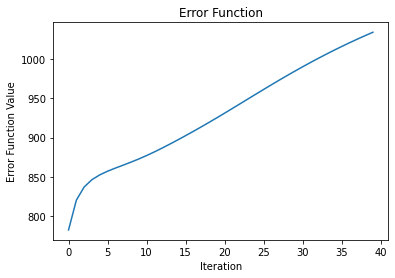

In [54]:
plt.title('Error Function')
plt.ylabel('Error Function Value')
plt.xlabel('Iteration')
plt.plot(list(error_values.keys()),list(error_values.values())) #Here is the line plot of the error function and iteration number. The error function seems to be optimized in the increasing order.

In [55]:
from sklearn.metrics import mean_squared_error # This is function used to calculate the RMSE
from math import sqrt
def RMSE(y_actual, y_predicted):
  rms = sqrt(mean_squared_error(y_actual, y_predicted))
  return round(rms,4)

In [56]:
testpath = '/content/drive/My Drive/CS5683/test_dataset.csv' # Path to the test dataset
true_rating = [] # list of collect the original rating
pred_rating = [] #list of collect the predicted rating
with open(testpath) as f:
  count = 0
  for line in f: # Read each line of the file
    lis = line.split(',') # split it using comma as it is CSV
    if count > 0: # to remove the first line read as it is the header line
      u = int(lis[0])-1 #First place consists of user id
      m = int(lis[1])-1 #Second place consists of movie id
      true_rating.append(int(lis[2])) #append the original rating to the list
      pred_rating.append(np.dot(P[u, :], Q[m, :].T)) # using dot product on P and Q matrix to predict the rating and appending it to list
    count +=1
print(RMSE(true_rating,pred_rating)) # calculate the RMSE finally

0.8957


Performace: Kalyan Kumar Alisetty has worked on this latent factor model implementation. Maruthi Sankar Nanduri has implementation Cosine similarity and Kalyan Kumar Alisetty has implemented the code for adjusted cosine similarity

Comparision of the two metrics models(CF and LF): The value for the RMSE on the test dataset is better for latent factor model(LF) compared to the collaborating filtering model(CF) as it has less value. LF model is the most advanced model compared to the CF as it also gives rating for the new movies or movies with less rating and also for new users.